### Redemption Curves
Using data from weekly redemption changes, the scatterplots of actual data are
created from x values of days since offer issue and the y values are created
from the cumulative redeemed offers divided by the total offers redeemed
over the life of the program.
#### Methodology
SciPy's Optimize.curve_fit is used to approximate the formula best fitting
the curves. It leverages the Levenberg-Marquardt algorithm
([Source](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)),
an iterative approach that minimizes the sum of the squared deviations.

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf

In [180]:
# from google.colab import drive
# drive.mount('/content/drive')

In [181]:
def func(x, a, b):
    """Approximates an exponential decay function using ML for
    optimization. The initial function resembles the exponential probability
    distribution, but the lambda parameter is not suitable, as the parameters
    a != b. The Gamma distribution may approximate the curves better, but
    there are not enough observations to determine the parameters"""
    return a * np.exp(-b * x)


def r_squared(x, y, a, b):
    """This is a simple calculation of R-Squared based off of the division of
    sum of squared residuals by the total sum of squares"""
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*x)')


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, s=12)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


def output(x, y, p0):
    """This initially fits the curve and returns the parameter estimates and the
    the covariance matrix, then calls the R-Squared and Plot functions"""
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [182]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
all_coupons = pd.read_csv('D:/GDrive/bayer_curves.csv')
p0 = [1.0, .07]

Data Example
                     Media_Type  Time_Since_Issue  Total_Dist_Percent
0     PAPERLESS + PRINT AT HOME                 5            0.320940
1     PAPERLESS + PRINT AT HOME                36            0.666091
2     PAPERLESS + PRINT AT HOME                66            0.006971
3     PAPERLESS + PRINT AT HOME                97            0.001068
4     PAPERLESS + PRINT AT HOME               128            0.000722
...                         ...               ...                 ...
2759           HANDOUT IN-STORE                12            0.107015
2760           HANDOUT IN-STORE                42            0.892985
2761            INSTANT ON-PACK                14            0.588138
2762            INSTANT ON-PACK                44            0.411862
2763           HANDOUT IN-STORE                10            1.000000

[2764 rows x 3 columns]
All
R^2 = 0.7773
Curve Formula: y=1.00874*exp^(-0.02448*x)


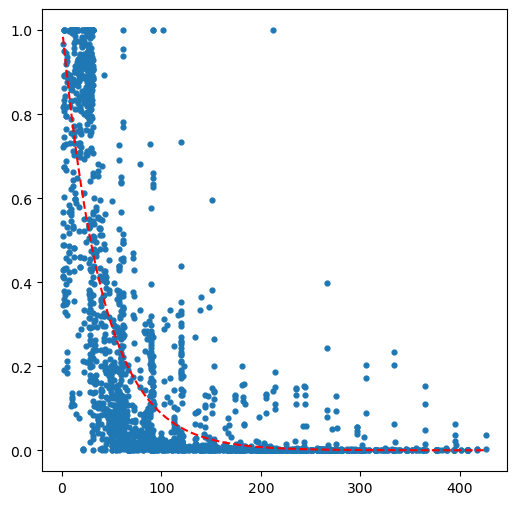

(1.00874, 0.02448)

In [183]:
print('Data Example')
print(all_coupons)
np_all = all_coupons[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_all[:, 0]
y = np_all[:, 1]

print('All')
output(x, y, p0)

Sunday FSI R^2 & Fit Chart
R^2 = 0.8125
Curve Formula: y=1.10464*exp^(-0.02747*x)


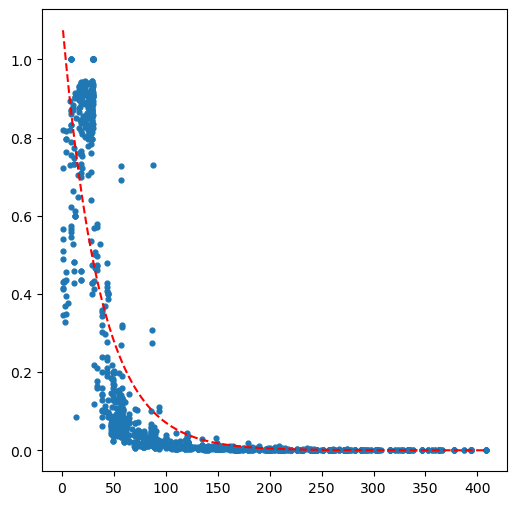

(1.10464, 0.02747)

In [184]:
#@title
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "SUNDAY FSI"]
np_sun_fsi = sun_fsi[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSI R^2 & Fit Chart')
output(x, y, p0)

Paperless R^2 & Fit Chart
R^2 = 0.6993
Curve Formula: y=1.05793*exp^(-0.02303*x)


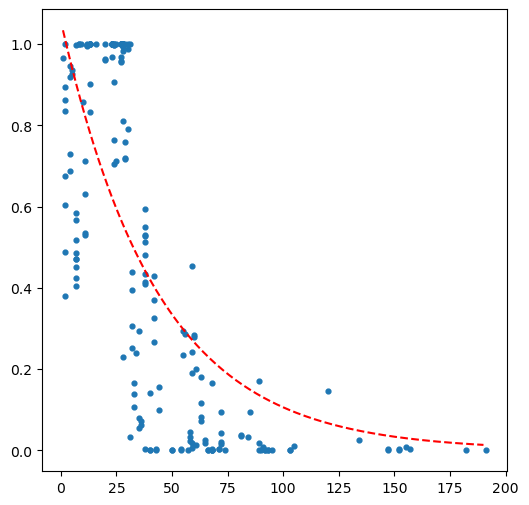

(1.05793, 0.02303)

In [185]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "PAPERLESS"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
output(x, y, p0)

Paperless + Print Group R^2 & Fit Chart
R^2 = 0.7342
Curve Formula: y=0.93864*exp^(-0.02384*x)


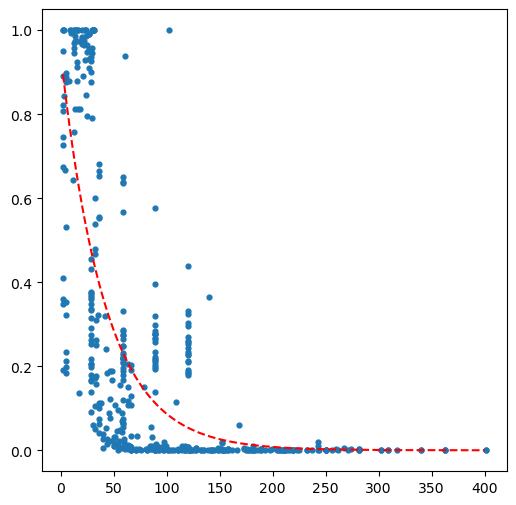

(0.93864, 0.02384)

In [186]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].
                      isin(["PAPERLESS + PRINT AT HOME", "PRINT AT HOME",
                            "PAPERLESS + PRINT AT HOME + HANDOUT"])]

np_paper_print = paper_print[['Time_Since_Issue',
                              'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
output(x, y, p0)

Handout Group R^2 & Fit Chart
R^2 = 0.8306
Curve Formula: y=0.51966*exp^(-0.01112*x)


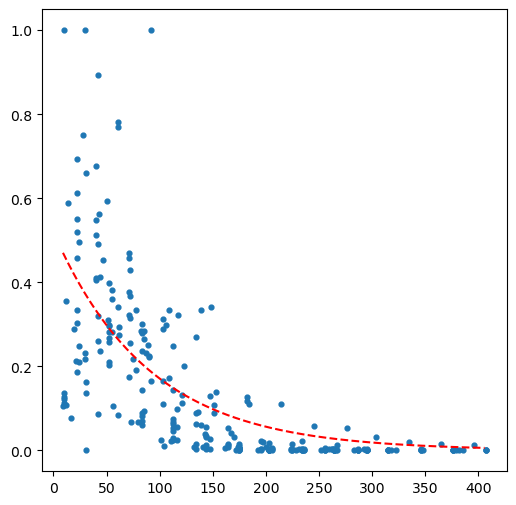

(0.51966, 0.01112)

In [187]:
#@title
# Handout Checkout Curve
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
                      isin(["HANDOUT", "HANDOUT IN-STORE",
                            "HANDOUT IN-STORE DISPLAY",
                            "HANDOUT IN-STORE TEARPAD",
                            "HANDOUT SHELF DISPENSER",
                            "HANDOUT WITH SAMPLE", "INSTANT ON-PACK",
                            "INSTANT ON-PACK FACTORY APPLIED", "ON-PACK"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
output(x, y, p0)

All Other Group R^2 & Fit Chart
R^2 = 0.7101
Curve Formula: y=0.25901*exp^(-0.0023*x)


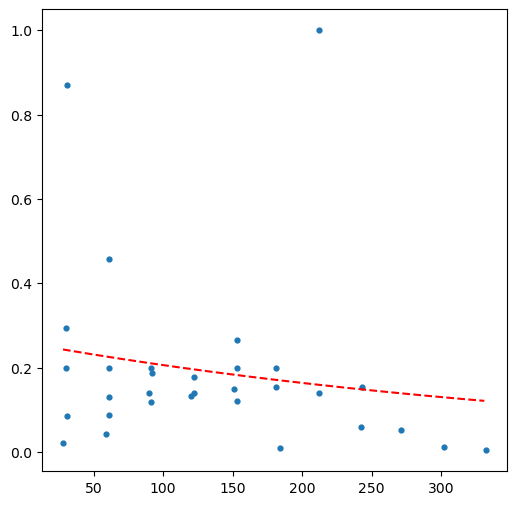

(0.25901, 0.0023)

In [188]:
#@title
# All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO

misc = all_coupons[all_coupons["Media_Type"].isin(["MISCELLANEOUS MEDIA",
                                                    "DIRECT MAIL SOLO",
                                                    "DIRECT MAIL"])]

np_misc = misc[['Time_Since_Issue',
                'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_misc[:, 0]
y = np_misc[:, 1]

print('All Other Group R^2 & Fit Chart')
output(x, y, p0)
